## *instats* Workshop, November 18-22, 2024 
### https://instats.org/seminar/computational-network-science-using-pyth2

# COMPUTATIONAL NETWORK SCIENCE USING PYTHON
## Moses Boudourides

# I. GRAPH TYPOLOGY

<span style="color:green">
    
### [1. Graphs in NetworkX](#1)

### [2. Undirected Graphs](#2)

### [3. Random Graphs](#3)
    
### [4. Directed Graphs](#4)

### [5. Bipartite Graphs](#5)

### [6. Trees](#6)

### [7. Weighted Graphs](#7)

### [8. Multigraphs](#8)

</span>

In [1]:
# The modules (libraries) of Python which are used in this notebook:

import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from collections import Counter
import random
import math
import pickle
import numpy as np
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph
from IPython.display import Image, display 

### What is a Graph?

A **graph** is a formal mathematical structure used to model *pairwise relations* between objects. Denoted as $G$, a graph consists of two main components:

$$G = (V,E)$$

**Vertices** (or **Nodes**) $V$: These are the individual objects or entities in a graph. Each vertex can represent various items depending on the graph's application, such as people in a social network, cities in a map, words in a text document etc.

**Edges** (or **Links**) $E$: These are the connections or relationships between pairs of vertices. 

A **network** is an empirical, real-world structure of relationships represented by a graph. In this context, <span style="color: darkorange;">we will use 'graphs' and 'networks,' as well as 'vertices' and 'nodes' and 'edges' and 'links,' interchangeably</span>.

In a graph, edges can be *directed* or *undirected*:

**Directed graph** (or **digraph**): Edges have a direction, indicating a one-way relationship. For instance, in a social network, a directed edge might represent a person following another person.

**Undirected graph**: Edges do not have a direction, indicating a mutual or bidirectional relationship, such as a friendship.

In graph theory, *connectedness* refers to a property of a graph where there is a sequence of successive vertices and incident edges between every pair of vertices (forming a **path**). A graph is considered **connected** if all its vertices can be reached from any other vertex through such paths; otherwise, it is termed **disconnected**. A **tree** is defined as a connected and **acyclic** graph (acyclic is a graph that contains no cycles).

A (typically undirected) graph can be either a **unipartite graph**, which is a graph whose vertices can all be part of a single set, or a **multipartite graph**, which consists of multiple sets of vertices, where edges can only connect vertices from different sets (but not vertices inside the same set). A **bipartite graph** is a specific type of multipartite graph with two sets of vertices.

Graphs can also have *multiple* or *weighted edges*, resp., called **multigraphs** or **weighted** (or **valued**) **graphs** that carry, resp., a positive integer or a numerical value representing the strength or capacity of the relationship.

Graphs are widely used in mathematics, computer science, engineering, physics, biology, sociology, anthropology, geography, transportation, economics, digital humanities and many other fields to solve various problems related to connectivity, flow, networking, and more. They serve as foundational models for numerous algorithms and applications within the interdisciplinary fields of **social network analysis**, **network science** and **complex networks**.

<a id='1'></a>
## <span style="color:green">1. Graphs in NetworkX</span>

### What is NetworkX?

**NetworkX** is a Python library designed for the creation, manipulation, and study of graphs. It provides tools to work with:

*Graph Types*: NetworkX supports various types of graphs including simple graphs, directed graphs, multigraphs, and multidiigraphs. This flexibility allows users to model a wide range of network structures.

*Graph Algorithms*: The library comes with numerous algorithms to analyze network structures, such as algorithms for finding connectivity patterns, shortest paths, clustering, centrality indices, community partitions etc. This makes it easy to perform complex computations and retrieve insightful data from networks.

*Input/Output*: NetworkX can read and write many formats of graphs, such as edge lists, adjacency lists, and adjacency matrices. It also supports several file formats commonly used in network science, facilitating the import and export of data.

*Visualization*: While NetworkX provides basic facilities for network visualization using Matplotlib, it can be integrated with other visualization tools for more complex rendering.

**NetworkX Documentation**: https://networkx.org/documentation/stable//index.html

**NetworkX Graph Generators**: https://networkx.org/documentation/stable//reference/generators.html

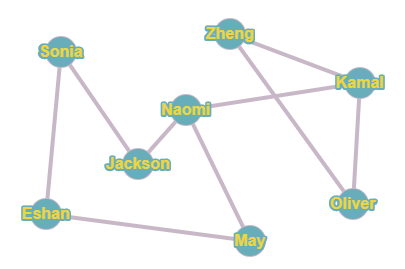

In [2]:
# A friendship network

display(Image('graph0.png')) 

In [3]:
def gne(G,name):
    if G.is_directed()==True:
        print("The %s graph is a directed graph" %name)
    else:
        print("The %s graph is an undirected graph" %name) 
    if nx.is_bipartite(G)==True:
        print("The %s is a bipartite graph" %name)
    if nx.is_weighted(G)==True:
        print("The %s graph is a weighted graph" %name)
    if G.is_multigraph()==True:
        print("The %s graph is a multigraph" %name)
    if nx.is_tree(G)==True:
        print("The %s graph is a tree" %name)
    nodes=sorted(G.nodes())
    if set([type(n) for n in G.nodes()])=={str}:
        sn=", ".join(nodes)
    else:
        sn=", ".join([str(n) for n in G.nodes()])
    if nx.is_weighted(G)==False:
        edges=sorted(G.edges())
        se=", ".join(["("+str(x[0])+", "+ str(x[1])+")" for x in edges])
    else:
        edges=sorted(G.edges(data=True))
        se=", ".join(["("+str(x[0])+", "+ str(x[1])+", weight="+str(x[2]['weight'])+")" for x in edges])
    print("The %s graph has %i nodes and %i edges.\nThe nodes are:\n %s.\nThe edges are:\n %s." %(name,len(nodes),len(edges),sn,se))

In [4]:
# List of edges:

list_of_edges=[("Sonia","Eshan"),("Sonia","Jackson"),
               ("Eshan","May"),
               ("May","Naomi"),
               ("Jackson","Naomi"),
               ("Naomi","Kamal"),
               ("Kamal","Zheng"),("Kamal","Oliver"),
               ("Zheng","Oliver")]
G = nx.Graph() # an empty (undirected) graph
G.add_edges_from(list_of_edges)
name = "Example 1"
gne(G,name)

The Example 1 graph is an undirected graph
The Example 1 graph has 8 nodes and 9 edges.
The nodes are:
 Eshan, Jackson, Kamal, May, Naomi, Oliver, Sonia, Zheng.
The edges are:
 (Eshan, May), (Jackson, Naomi), (Kamal, Oliver), (Kamal, Zheng), (May, Naomi), (Naomi, Kamal), (Sonia, Eshan), (Sonia, Jackson), (Zheng, Oliver).


### Graph Layouts in NetworkX

In the context of NetworkX, a graph **layout** refers to the arrangement of nodes and edges in a visual representation of a graph. The layout determines how the graph is displayed, which can significantly affect the readability and interpretability of the graph.

NetworkX provides various layout algorithms to position nodes in two-dimensional space. Two popular layouts are: 

- **Spring Layout**, which uses a force-directed algorithm where nodes repel each other while edges act like springs that pull connected nodes together. It aims to minimize edge crossings and distribute nodes evenly.<br>
<br>
- **PyGraphviz**, which is the Python interface to the **Graphviz** graph visualization software. It allows NetworkX to utilize Graphviz’s powerful layout algorithms to create high-quality visual representations of graphs. 

<span style="color: blue;">PyGraphViz is the default layout that we are using in the code of this workshop.</span>
<br><br>
<span style="color: red;">If you encounter issues installing PyGraphviz, consider using the spring layout instead. To do this, replace command "pos=graphviz_layout(G)" with command "pos = nx.spring_layout(G, k=value)", where parameter k defines the optimal distance between nodes affecting how spread out the nodes will be in the final layout. If k is too small, the nodes may overlap, resulting in a cluttered visualization. If k is too large, the nodes will be too far apart, making the graph harder to interpret.</span>

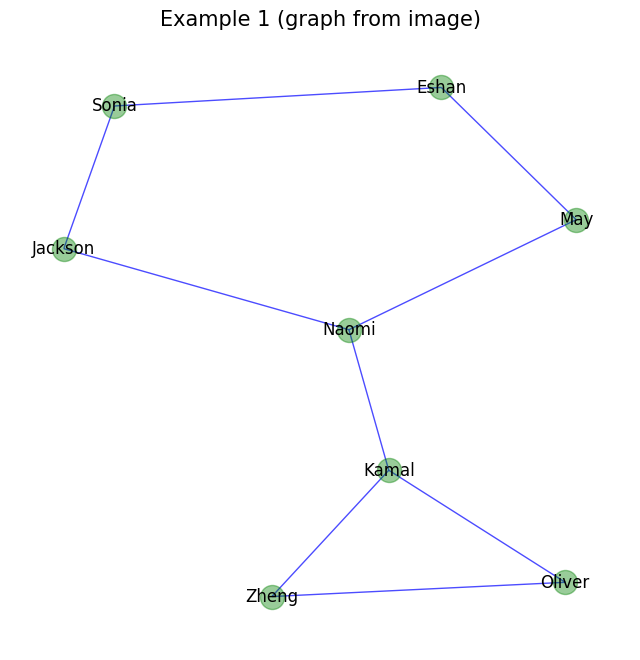

In [5]:
# Graph plot in default pygraphviz layout

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name+" (graph from image)",fontsize=15);

In [6]:
# Positions of nodes in the graph layout 

for k,v in pos.items():
    print(k,v)

Sonia (52.16, 286.87)
Eshan (129.99, 297.02)
Jackson (40.092, 208.66)
May (162.09, 224.56)
Naomi (107.98, 164.25)
Kamal (117.46, 87.218)
Zheng (89.633, 18.0)
Oliver (159.48, 25.802)


In [7]:
new_pos={}
xa=1.4
ya=0.5
new_pos["Eshan"]=(0,0)
new_pos["May"]=(xa*1.3,-ya*0.1)
new_pos["Sonia"]=(xa*0.1,ya*0.8)
new_pos["Jackson"]=(xa*0.5,ya*0.4)
new_pos["Naomi"]=(xa*0.9,ya*0.6)
new_pos["Zheng"]=(xa*1.3,ya*1.0)
new_pos["Oliver"]=(xa*2,ya*0.1)
new_pos["Kamal"]=(xa*2.1,ya*0.9)

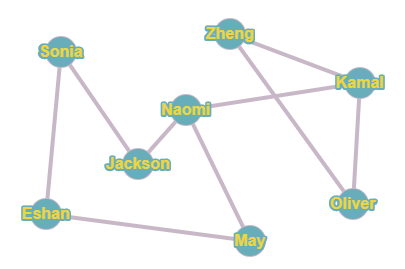

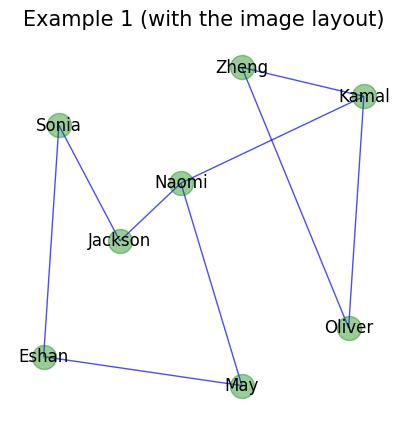

In [8]:
# Graph plot in the layout of the image

pos=new_pos
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name+" (with the image layout)",fontsize=15);

display(Image('graph0.png')) #, width=1900, unconfined=True))

### Saving a Graph (as a file)

In [9]:
# Saving (pickeling) the previous graph G

with open("Graph_"+name.replace(" ","")+"_from_image.pkl", "wb") as f:
    pickle.dump(G, f)

In [10]:
# Reading a saved (pickeled) graph

with open("Graph_"+name.replace(" ","")+"_from_image.pkl", "rb") as f:
    G1 = pickle.load(f)

In [11]:
gne(G1,name)

The Example 1 graph is an undirected graph
The Example 1 graph has 8 nodes and 9 edges.
The nodes are:
 Eshan, Jackson, Kamal, May, Naomi, Oliver, Sonia, Zheng.
The edges are:
 (Eshan, May), (Jackson, Naomi), (Kamal, Oliver), (Kamal, Zheng), (May, Naomi), (Naomi, Kamal), (Sonia, Eshan), (Sonia, Jackson), (Zheng, Oliver).


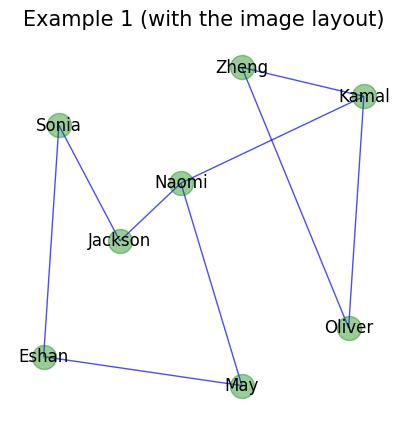

In [12]:
pos=new_pos
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G1, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G1, pos,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G1, pos)
plt.axis('off');
plt.title(name+" (with the image layout)",fontsize=15);

<a id='2'></a>
## <span style="color:green">2. Undirected Graphs</span>

The Florentine Families graph is an undirected graph
The Florentine Families graph has 15 nodes and 20 edges.
The nodes are:
 Acciaiuoli, Albizzi, Barbadori, Bischeri, Castellani, Ginori, Guadagni, Lamberteschi, Medici, Pazzi, Peruzzi, Ridolfi, Salviati, Strozzi, Tornabuoni.
The edges are:
 (Acciaiuoli, Medici), (Albizzi, Ginori), (Albizzi, Guadagni), (Bischeri, Guadagni), (Castellani, Barbadori), (Castellani, Peruzzi), (Castellani, Strozzi), (Guadagni, Lamberteschi), (Medici, Albizzi), (Medici, Barbadori), (Medici, Ridolfi), (Medici, Salviati), (Medici, Tornabuoni), (Peruzzi, Bischeri), (Peruzzi, Strozzi), (Ridolfi, Tornabuoni), (Salviati, Pazzi), (Strozzi, Bischeri), (Strozzi, Ridolfi), (Tornabuoni, Guadagni).


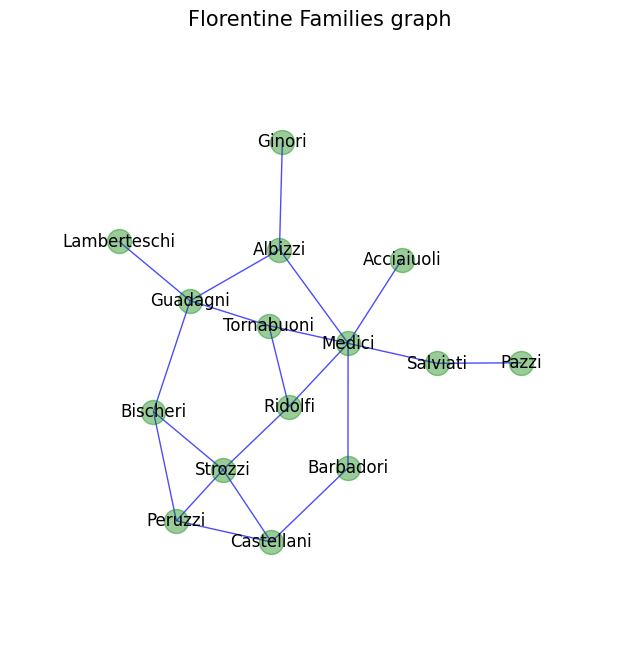

In [13]:
name = "Florentine Families"
Gff = nx.florentine_families_graph()
gne(Gff,name)

pos=graphviz_layout(Gff)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(Gff, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(Gff, pos,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(Gff, pos)
plt.axis('off');
plt.title(name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

The Karate Club graph is an undirected graph
The Karate Club graph is a weighted graph
The Karate Club graph has 34 nodes and 78 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33.
The edges are:
 (0, 1, weight=4), (0, 2, weight=5), (0, 3, weight=3), (0, 4, weight=3), (0, 5, weight=3), (0, 6, weight=3), (0, 7, weight=2), (0, 8, weight=2), (0, 10, weight=2), (0, 11, weight=3), (0, 12, weight=1), (0, 13, weight=3), (0, 17, weight=2), (0, 19, weight=2), (0, 21, weight=2), (0, 31, weight=2), (1, 2, weight=6), (1, 3, weight=3), (1, 7, weight=4), (1, 13, weight=5), (1, 17, weight=1), (1, 19, weight=2), (1, 21, weight=2), (1, 30, weight=2), (2, 3, weight=3), (2, 7, weight=4), (2, 8, weight=5), (2, 9, weight=1), (2, 13, weight=3), (2, 27, weight=2), (2, 28, weight=2), (2, 32, weight=2), (3, 7, weight=3), (3, 12, weight=3), (3, 13, weight=3), (4, 6, weight=2), (4, 10, weight=3), (5, 6, weight=5), (5

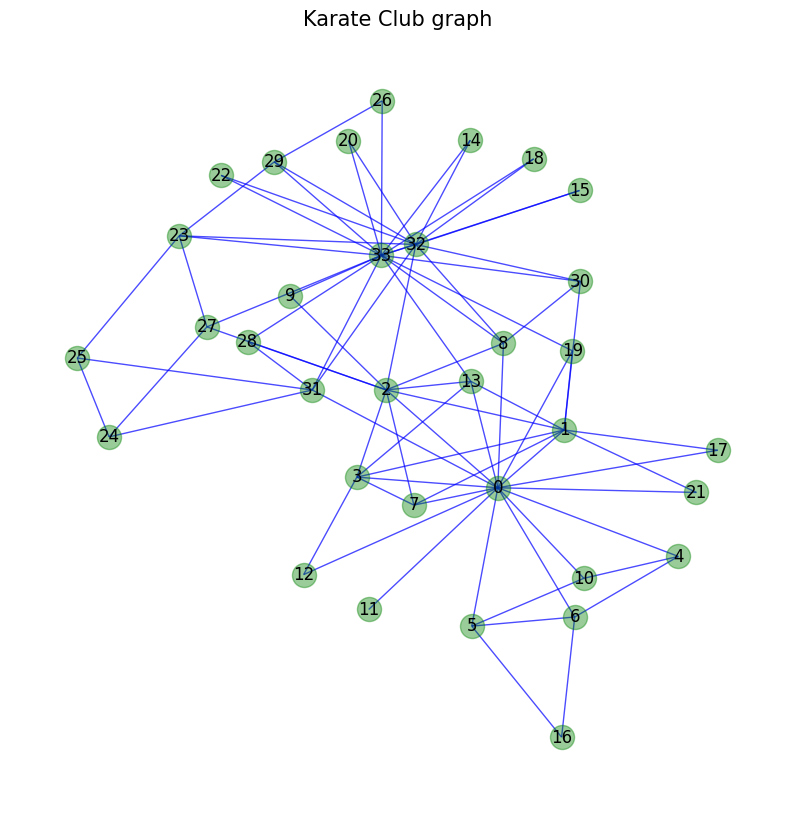

In [14]:
name = "Karate Club"
Gkc = nx.karate_club_graph()
gne(Gkc,name)

pos=graphviz_layout(Gkc)
plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(Gkc, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(Gkc, pos,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(Gkc, pos)
plt.axis('off');
plt.title(name+" graph",fontsize=15);
# plt.margins(x=0.2, y=0.2)

<a id='3'></a>
## <span style="color:green">3. Random Graphs</span>

A **random graph** is a type of graph that is generated by some random process. Unlike deterministic graphs, whose structure is defined explicitly, random graphs are built using probability models where the presence or absence of edges is determined randomly. 

NetworkX covers several types of random graphs, including:

1. **Erdős–Rényi Graphs** (or **Binomial Graphs**):
   - $G(n, p)$: A graph with $n$ vertices where each edge is included with a probability $p$.
   - $G(n, m)$: A graph with $n$ vertices and $m$ edges chosen uniformly at random.<br>
<br>
2. **Barabási-Albert Graphs**:
   - Scale-free networks generated using the **preferential attachment** model.<br>
<br>
3. **Watts-Strogatz Graphs**:
   - **Small-world** networks characterized by a high clustering coefficient and short average path lengths.<br>
<br>
4. **Stochastic Block Models**:
   - Graphs with clusters or communities, where the probability of edges between vertices depends on their membership in these clusters.<br>
<br>
5. **Power Law Graphs**:
   - Graphs that follow a power-law degree distribution, often used to model real-world networks (such as in **scale-free networks**).<br>
<br>
6. **Configuration Model**:
   - A random graph generated with a specified degree sequence, where the edges are randomly assigned to match the desired degree distribution.

<a id='4'></a>
## <span style="color:green">4. Directed Graphs</span>

The directed Erdos-Renyi random graph is a directed graph
The directed Erdos-Renyi random is a bipartite graph
The directed Erdos-Renyi random graph has 10 nodes and 8 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.
The edges are:
 (0, 2), (1, 4), (1, 5), (1, 7), (2, 0), (2, 7), (4, 9), (6, 7).


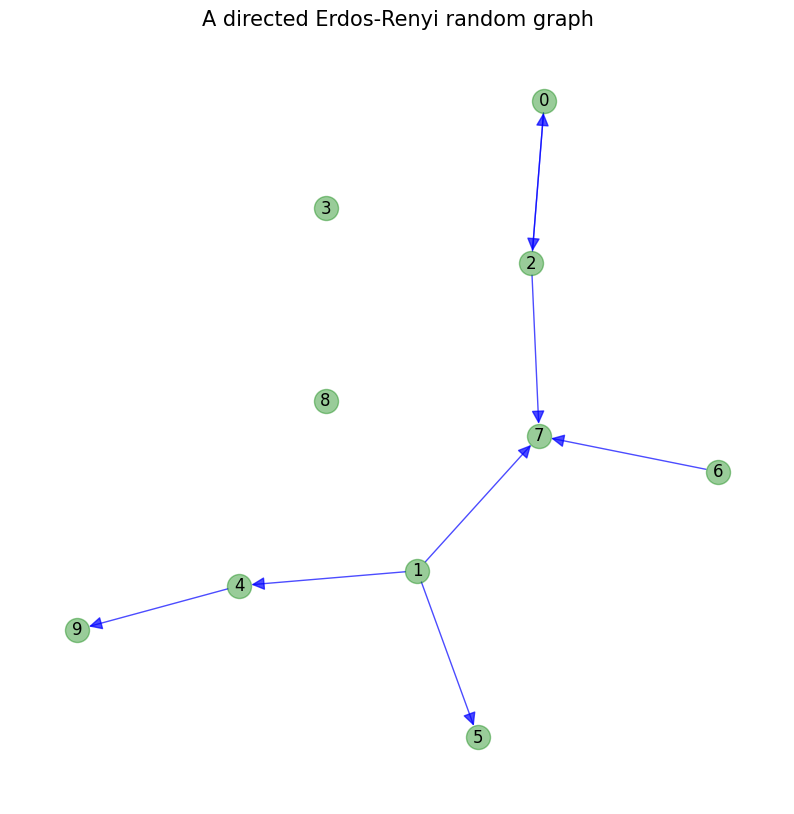

In [15]:
name = "directed Erdos-Renyi random"
Ger = nx.erdos_renyi_graph(n=10, p=0.15, directed=True)
gne(Ger,name)

pos=graphviz_layout(Ger)
plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(Ger, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(Ger,pos,arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(Ger, pos)
plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);
# plt.margins(x=0.2, y=0.2)

The directed Gnm random graph is a directed graph
The directed Gnm random graph has 10 nodes and 17 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.
The edges are:
 (0, 2), (1, 2), (1, 6), (2, 3), (2, 8), (3, 0), (3, 7), (4, 1), (5, 9), (6, 9), (7, 4), (7, 5), (7, 9), (8, 0), (8, 3), (8, 5), (9, 8).


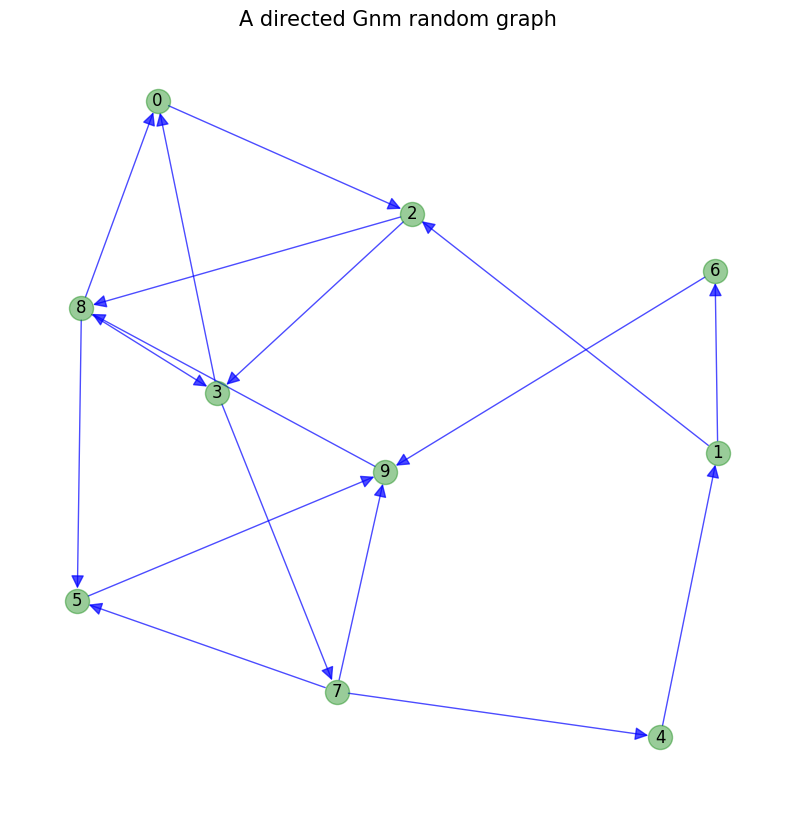

In [16]:
name = "directed Gnm random"
Gnm = nx.gnm_random_graph(n=10, m=17, directed=True)
gne(Gnm,name)

pos=graphviz_layout(Gnm)
plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(Gnm, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(Gnm,pos,arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(Gnm, pos)
plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);
# plt.margins(x=0.2, y=0.2)

The directed Binomial graph is a directed graph
The directed Binomial graph has 20 nodes and 33 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19.
The edges are:
 (0, 5), (1, 13), (1, 14), (1, 19), (2, 9), (2, 14), (3, 6), (3, 16), (4, 1), (4, 2), (4, 8), (4, 10), (4, 12), (6, 13), (8, 12), (8, 19), (9, 15), (11, 4), (11, 9), (12, 16), (13, 5), (14, 13), (14, 15), (15, 1), (16, 0), (17, 3), (17, 4), (17, 12), (17, 15), (18, 8), (19, 7), (19, 13), (19, 18).


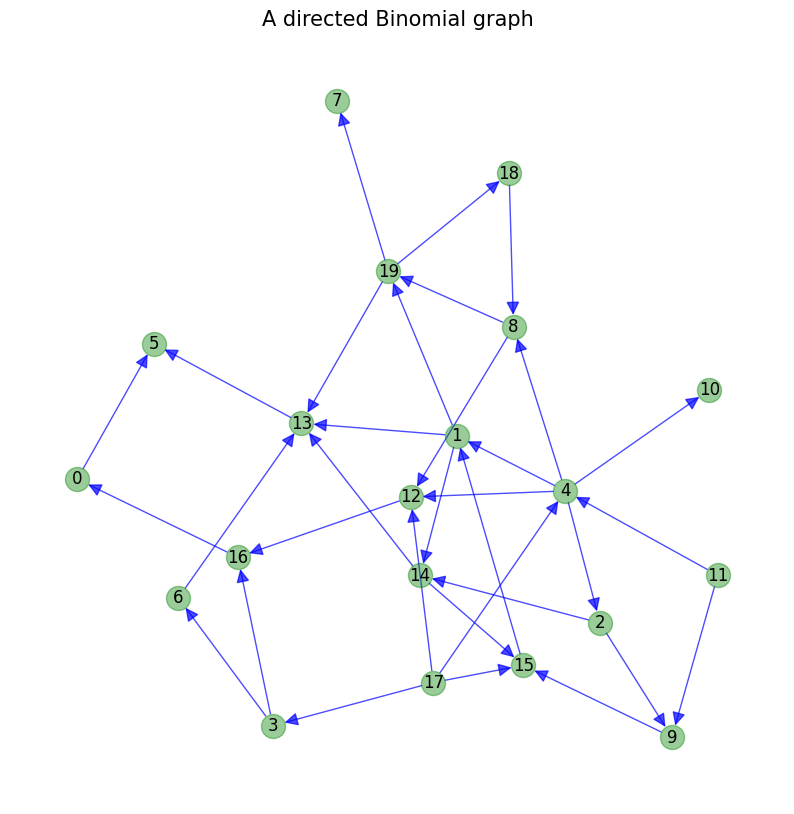

In [17]:
name = "directed Binomial"
Gnm = nx.gnp_random_graph(n=20, p=0.1, directed=True)
gne(Gnm,name)

pos=graphviz_layout(Gnm)
plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(Gnm, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(Gnm,pos,arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(Gnm, pos)
plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);
# plt.margins(x=0.2, y=0.2)

<a id='5'></a>
## <span style="color:green">5. Bipartite Graphs</span>

A **bipartite graph** is an undirected graph in which the set of nodes is partitioned in two sets and the only existing edges are between the nodes of this bipartition (i.e., there are no edges inside each bipartition).

The Southern women graph is an undirected graph
The Southern women is a bipartite graph
The Southern women graph has 32 nodes and 89 edges.
The nodes are:
 Brenda Rogers, Charlotte McDowd, Dorothy Murchison, E1, E10, E11, E12, E13, E14, E2, E3, E4, E5, E6, E7, E8, E9, Eleanor Nye, Evelyn Jefferson, Flora Price, Frances Anderson, Helen Lloyd, Katherina Rogers, Laura Mandeville, Myra Liddel, Nora Fayette, Olivia Carleton, Pearl Oglethorpe, Ruth DeSand, Sylvia Avondale, Theresa Anderson, Verne Sanderson.
The edges are:
 (Brenda Rogers, E1), (Brenda Rogers, E3), (Brenda Rogers, E4), (Brenda Rogers, E5), (Brenda Rogers, E6), (Brenda Rogers, E7), (Brenda Rogers, E8), (Charlotte McDowd, E3), (Charlotte McDowd, E4), (Charlotte McDowd, E5), (Charlotte McDowd, E7), (Dorothy Murchison, E8), (Dorothy Murchison, E9), (Eleanor Nye, E5), (Eleanor Nye, E6), (Eleanor Nye, E7), (Eleanor Nye, E8), (Evelyn Jefferson, E1), (Evelyn Jefferson, E2), (Evelyn Jefferson, E3), (Evelyn Jefferson, E4), (Evelyn Jeff

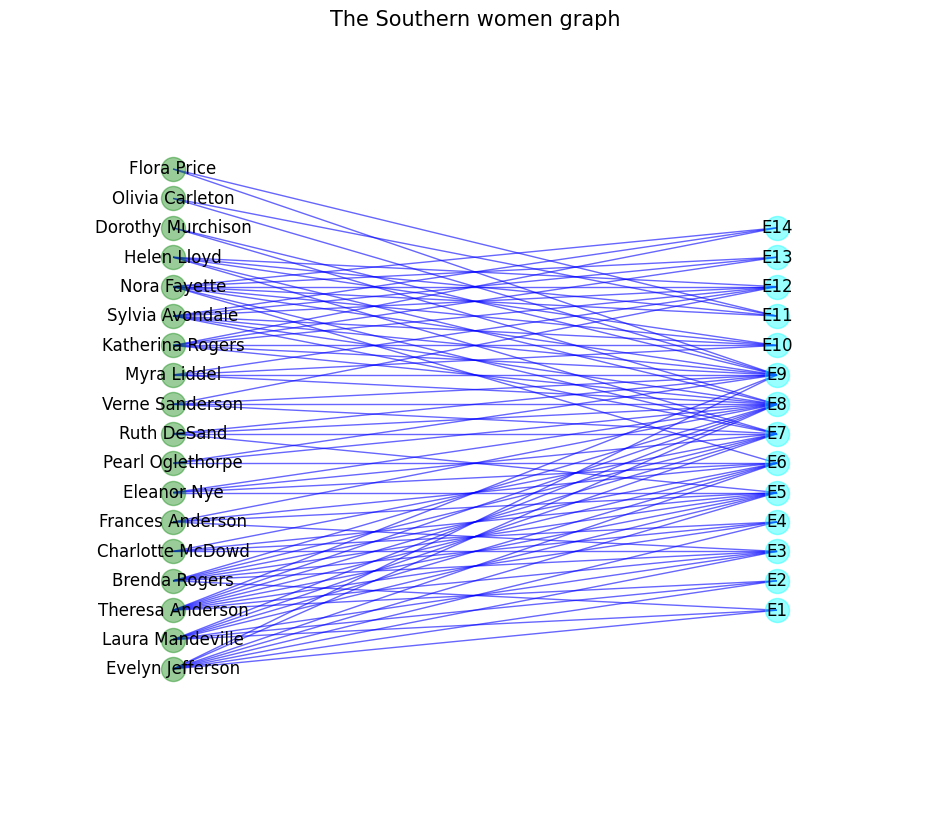

In [18]:
name = "Southern women"

Gsw = nx.davis_southern_women_graph()

X=[n for n in Gsw.nodes() if len(n)>3]
Y=[n for n in Gsw.nodes() if len(n)<4]

gne(Gsw,name)

pos = {}
for i, x in enumerate(X):
    pos[x] = (0, i)  # Left mode positions

# Calculate elevation for the right mode (Y)
y_elevation = (len(X)-len(Y))/2
for j, y in enumerate(Y):
    pos[y] = (1, j + y_elevation) 
    
plt.figure(figsize=(12,10));
nodes1 = nx.draw_networkx_nodes(Gsw, pos, nodelist=list(X), node_color="g", alpha=0.4)
nodes2 = nx.draw_networkx_nodes(Gsw, pos, nodelist=list(Y), node_color="cyan", alpha=0.4)
nx.draw_networkx_edges(Gsw, pos, edge_color="b", alpha=0.6)
nx.draw_networkx_labels(Gsw, pos)
plt.axis('off');
plt.title("The "+name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

The X-Y random bipartite graph is an undirected graph
The X-Y random bipartite is a bipartite graph
The X-Y random bipartite graph has 16 nodes and 25 edges.
The nodes are:
 x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, y0, y1, y2, y3, y4, y5.
The edges are:
 (x0, y0), (x1, y4), (x1, y5), (x2, y0), (x2, y3), (x2, y4), (x3, y0), (x4, y1), (x4, y2), (x4, y3), (x5, y0), (x5, y1), (x5, y2), (x5, y3), (x6, y0), (x6, y2), (x6, y3), (x6, y4), (x7, y3), (x7, y4), (x7, y5), (x8, y0), (x8, y2), (x8, y5), (x9, y4).


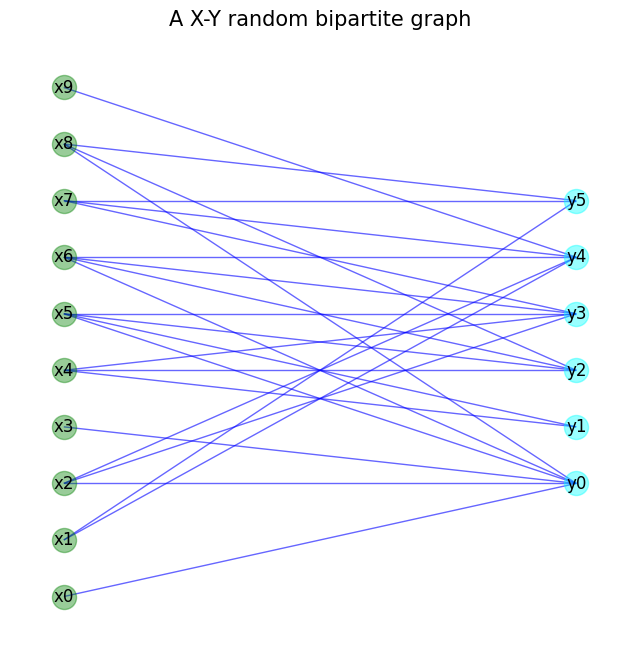

In [19]:
# Construction of a random bipartite set with a bipartition X, Y
# where len(X)=10 and len(Y)=6.

name = "X-Y random bipartite"
B = nx.Graph()
X = ["x"+str(i) for i in range(10)]
Y = ["y"+str(i) for i in range(6)]

XY = [(x,y) for x in X for y in Y]
p = random.uniform(0.4,0.5)   # probability of edge occurrence
E = random.sample(XY,int(p*len(XY)))

B.add_nodes_from(X, bipartite=0)
B.add_nodes_from(Y, bipartite=1)
B.add_edges_from(E)

gne(B,name)

pos = {}
for i, x in enumerate(X):
    pos[x] = (0, i)  # Left mode positions

# Calculate elevation for the right mode (Y)
y_elevation = (len(X)-len(Y))/2
for j, y in enumerate(Y):
    pos[y] = (1, j + y_elevation) 

plt.figure(figsize=(8,8));
nodes1 = nx.draw_networkx_nodes(B, pos, nodelist=list(X), node_color="g", alpha=0.4)
nodes2 = nx.draw_networkx_nodes(B, pos, nodelist=list(Y), node_color="cyan", alpha=0.4)
nx.draw_networkx_edges(B, pos, edge_color="b", alpha=0.6)
nx.draw_networkx_labels(B, pos)
plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);

The X-Y random bipartite graph is an undirected graph
The X-Y random bipartite is a bipartite graph
The X-Y random bipartite graph has 16 nodes and 60 edges.
The nodes are:
 x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, y0, y1, y2, y3, y4, y5.
The edges are:
 (x0, y0), (x0, y1), (x0, y2), (x0, y3), (x0, y4), (x0, y5), (x1, y0), (x1, y1), (x1, y2), (x1, y3), (x1, y4), (x1, y5), (x2, y0), (x2, y1), (x2, y2), (x2, y3), (x2, y4), (x2, y5), (x3, y0), (x3, y1), (x3, y2), (x3, y3), (x3, y4), (x3, y5), (x4, y0), (x4, y1), (x4, y2), (x4, y3), (x4, y4), (x4, y5), (x5, y0), (x5, y1), (x5, y2), (x5, y3), (x5, y4), (x5, y5), (x6, y0), (x6, y1), (x6, y2), (x6, y3), (x6, y4), (x6, y5), (x7, y0), (x7, y1), (x7, y2), (x7, y3), (x7, y4), (x7, y5), (x8, y0), (x8, y1), (x8, y2), (x8, y3), (x8, y4), (x8, y5), (x9, y0), (x9, y1), (x9, y2), (x9, y3), (x9, y4), (x9, y5).


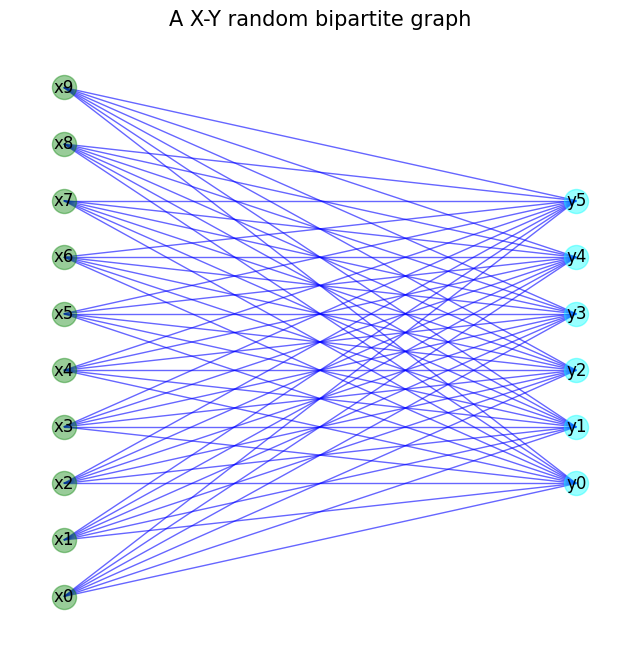

In [20]:
# Construction of a random bipartite set with a bipartition X, Y
# where len(X)=10 and len(Y)=6.

name = "X-Y random bipartite"
B = nx.Graph()
X = ["x"+str(i) for i in range(10)]
Y = ["y"+str(i) for i in range(6)]

XY = [(x,y) for x in X for y in Y]
p = 1 #random.uniform(0.4,0.5)   # probability of edge occurrence
E = random.sample(XY,int(p*len(XY)))

B.add_nodes_from(X, bipartite=0)
B.add_nodes_from(Y, bipartite=1)
B.add_edges_from(E)

gne(B,name)

pos = {}
for i, x in enumerate(X):
    pos[x] = (0, i)  # Left mode positions

# Calculate elevation for the right mode (Y)
y_elevation = (len(X)-len(Y))/2
for j, y in enumerate(Y):
    pos[y] = (1, j + y_elevation)  

plt.figure(figsize=(8,8));
nodes1 = nx.draw_networkx_nodes(B, pos, nodelist=list(X), node_color="g", alpha=0.4)
nodes2 = nx.draw_networkx_nodes(B, pos, nodelist=list(Y), node_color="cyan", alpha=0.4)
nx.draw_networkx_edges(B, pos, edge_color="b", alpha=0.6)
nx.draw_networkx_labels(B, pos)
plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);

The Erdos-Renyi random bipartite graph is an undirected graph
The Erdos-Renyi random bipartite is a bipartite graph
The Erdos-Renyi random bipartite graph has 15 nodes and 28 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.
The edges are:
 (0, 1), (0, 4), (0, 6), (0, 7), (1, 2), (1, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 6), (3, 7), (3, 10), (3, 11), (4, 12), (4, 13), (5, 7), (5, 11), (6, 12), (6, 14), (7, 12), (7, 13), (8, 13), (8, 14), (10, 12), (11, 12), (11, 13), (11, 14).


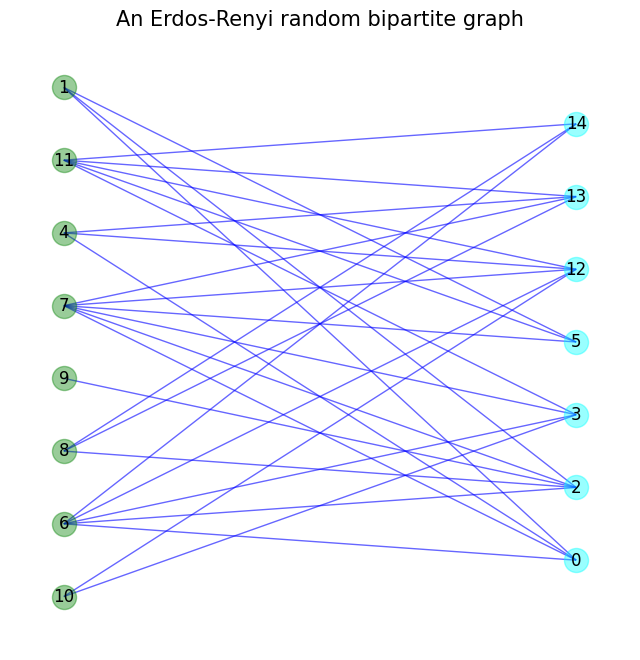

In [21]:
# Construction of a random bipartite graph by bipartitioning the nodes of 
# a random Erdos-Renyi graph into the bipartition X, Y with len(X) = 8, len(Y) = 7, 
# and removing edges inside the sets of the bipartition.

name = "Erdos-Renyi random bipartite"
Ger=nx.erdos_renyi_graph(n=15, p=0.5, directed=False)

X=random.sample(list(Ger.nodes()),8)
Y=[n for n in Ger.nodes() if n not in X]

I=[e for e in Ger.edges() if (e[0] in X and e[1] in X) or (e[0] in Y and e[1] in Y)]
Ger.remove_edges_from(I)

gne(Ger,name)

pos = {}
for i, x in enumerate(X):
    pos[x] = (0, i)  # Left mode positions

# Calculate elevation for the right mode (Y)
y_elevation = (len(X)-len(Y))/2
for j, y in enumerate(Y):
    pos[y] = (1, j + y_elevation) 
    
plt.figure(figsize=(8,8));
nodes1 = nx.draw_networkx_nodes(Ger, pos, nodelist=list(X), node_color="g", alpha=0.4)
nodes2 = nx.draw_networkx_nodes(Ger, pos, nodelist=list(Y), node_color="cyan", alpha=0.4)
nx.draw_networkx_edges(Ger, pos, edge_color="b", alpha=0.6)
nx.draw_networkx_labels(Ger, pos)
plt.axis('off');
plt.title("An "+name+" graph",fontsize=15);

<a id='6'></a>
## <span style="color:green">6. Trees</span>

A **binomial tree** is a recursive tree structure that forms the basis for efficient data operations in certain algorithms, especially in the implementation of binomial heaps.

The binomial tree graph is an undirected graph
The binomial tree is a bipartite graph
The binomial tree graph is a tree
The binomial tree graph has 32 nodes and 31 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 20, 24, 19, 21, 22, 23, 25, 26, 28, 27, 29, 30, 31.
The edges are:
 (0, 1), (0, 2), (0, 4), (0, 8), (0, 16), (2, 3), (4, 5), (4, 6), (6, 7), (8, 9), (8, 10), (8, 12), (10, 11), (12, 13), (12, 14), (14, 15), (16, 17), (16, 18), (16, 20), (16, 24), (18, 19), (20, 21), (20, 22), (22, 23), (24, 25), (24, 26), (24, 28), (26, 27), (28, 29), (28, 30), (30, 31).


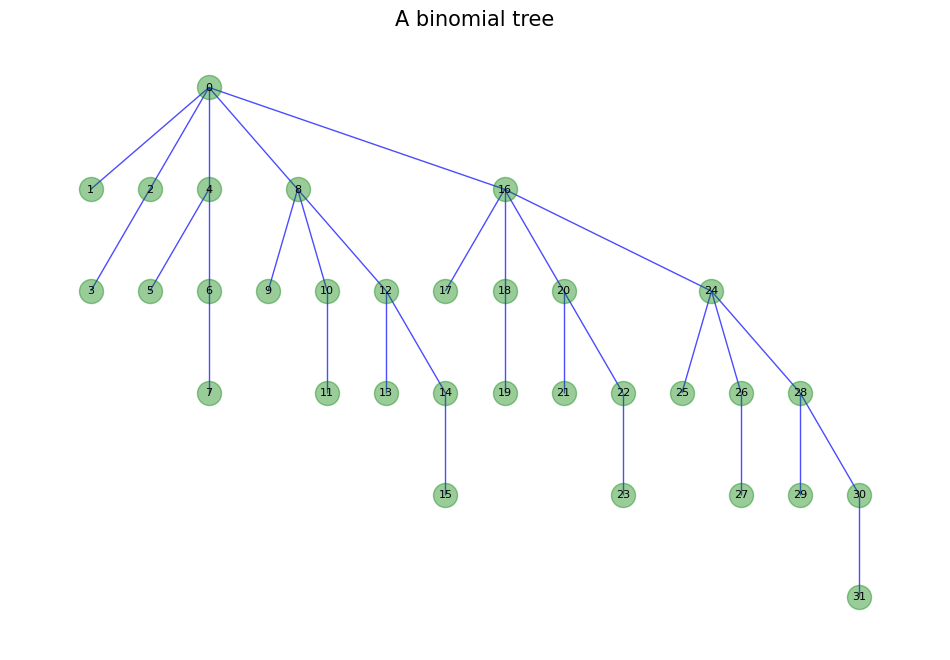

In [22]:
name="binomial tree"
n=random.randint(3,6) #number of nodes
T=nx.binomial_tree(n)

gne(T,name)

pos=graphviz_layout(T)
plt.figure(figsize=(12,8));
pos=graphviz_layout(T, prog='dot') #, args="-Grankdir=LR")
nodes = nx.draw_networkx_nodes(T, pos, node_color="g", alpha=0.4)#,)
nx.draw_networkx_edges(T, pos, edge_color='b', alpha=0.7)
nx.draw_networkx_labels(T, pos,font_size=8)
plt.axis('off');
plt.title("A "+name,fontsize=15);

A **preferential attachment tree** is a tree representing a growth process in which new nodes connect to existing nodes with a probability proportional to the degree of the existing nodes (**preferential attachment model**). This mechanism leads to the emergence of a hierarchical structure, called **scale-free network**, with a few highly connected nodes and many nodes with fewer connections, capturing the essence of many real-world networks.

The preferential attachment tree graph is an undirected graph
The preferential attachment tree is a bipartite graph
The preferential attachment tree graph is a tree
The preferential attachment tree graph has 20 nodes and 19 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19.
The edges are:
 (0, 1), (0, 3), (0, 4), (0, 5), (0, 9), (0, 10), (0, 14), (0, 15), (1, 2), (1, 6), (1, 11), (1, 13), (5, 7), (5, 12), (7, 8), (7, 16), (12, 17), (12, 18), (16, 19).


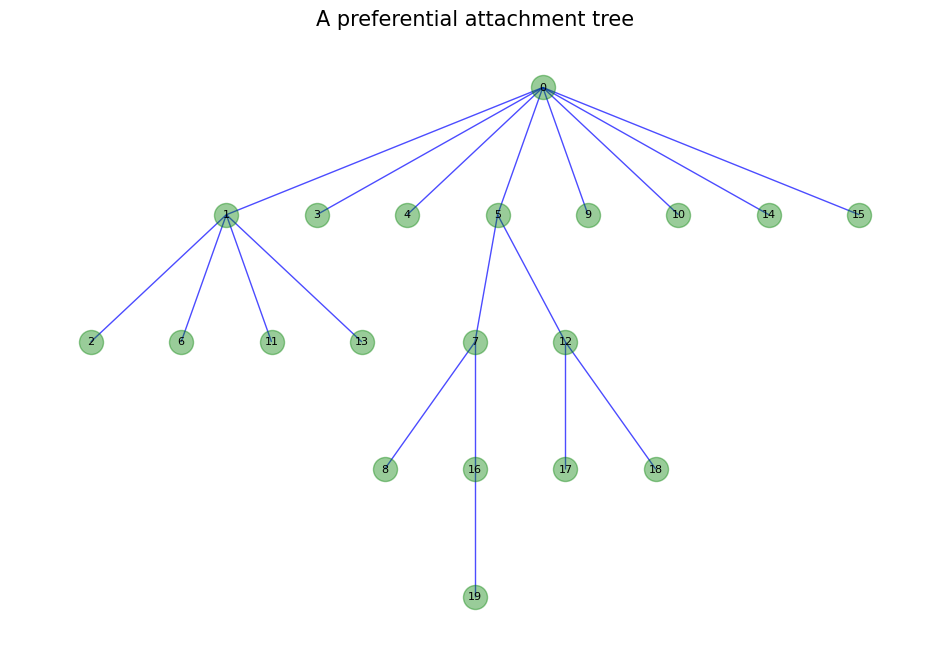

In [23]:
name="preferential attachment tree"
T=nx.barabasi_albert_graph(n=20, m=1)

gne(T,name)

pos=graphviz_layout(T)
plt.figure(figsize=(12,8));
pos=graphviz_layout(T, prog='dot') #, args="-Grankdir=LR")
nodes = nx.draw_networkx_nodes(T, pos, node_color="g", alpha=0.4)#,)
nx.draw_networkx_edges(T, pos, edge_color='b', alpha=0.7)
nx.draw_networkx_labels(T, pos,font_size=8)
plt.axis('off');
plt.title("A "+name,fontsize=15);

In [24]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

A **spanning tree** of a graph is a connected subgraph that includes all the vertices of the graph and it is acyclic.

The minimum spanning tree of an Erdos-Renyi graph is an undirected graph
The minimum spanning tree of an Erdos-Renyi is a bipartite graph
The minimum spanning tree of an Erdos-Renyi graph is a tree
The minimum spanning tree of an Erdos-Renyi graph has 20 nodes and 19 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19.
The edges are:
 (0, 7), (0, 9), (0, 10), (0, 15), (0, 19), (1, 3), (1, 8), (1, 11), (1, 12), (1, 13), (1, 15), (1, 17), (2, 3), (3, 4), (4, 6), (4, 18), (5, 6), (5, 14), (5, 16).


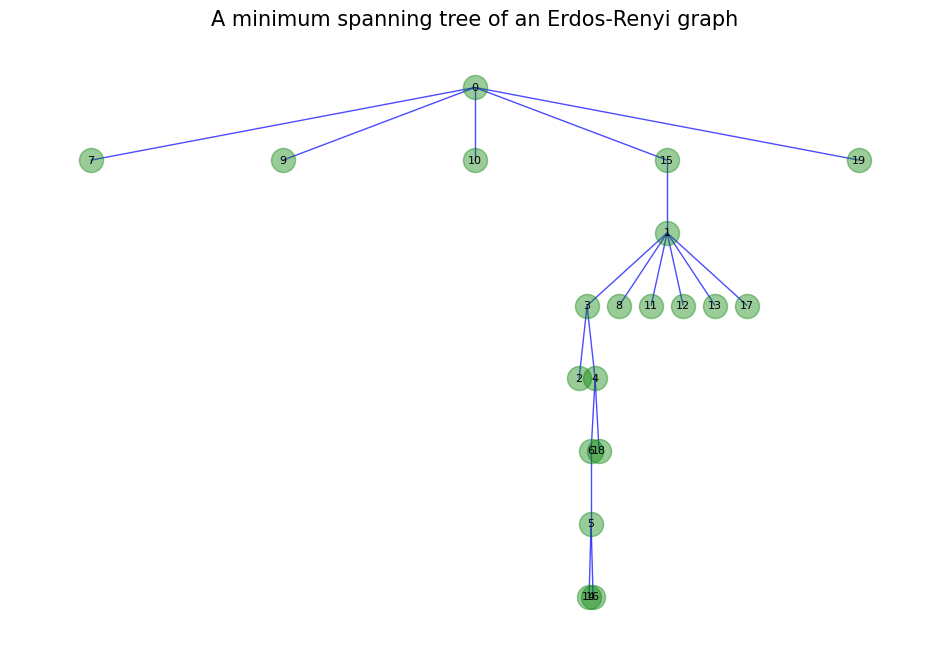

In [25]:
name="minimum spanning tree of an Erdos-Renyi"
Ger=nx.erdos_renyi_graph(n=20, p=0.5, directed=False)
T = nx.minimum_spanning_tree(Ger)

gne(T,name)

plt.figure(figsize=(12,8));

pos = hierarchy_pos(T,0)    
nodes = nx.draw_networkx_nodes(T, pos, node_color="g", alpha=0.4)#,)
nx.draw_networkx_edges(T, pos, edge_color='b', alpha=0.7)
nx.draw_networkx_labels(T, pos,font_size=8)

plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);

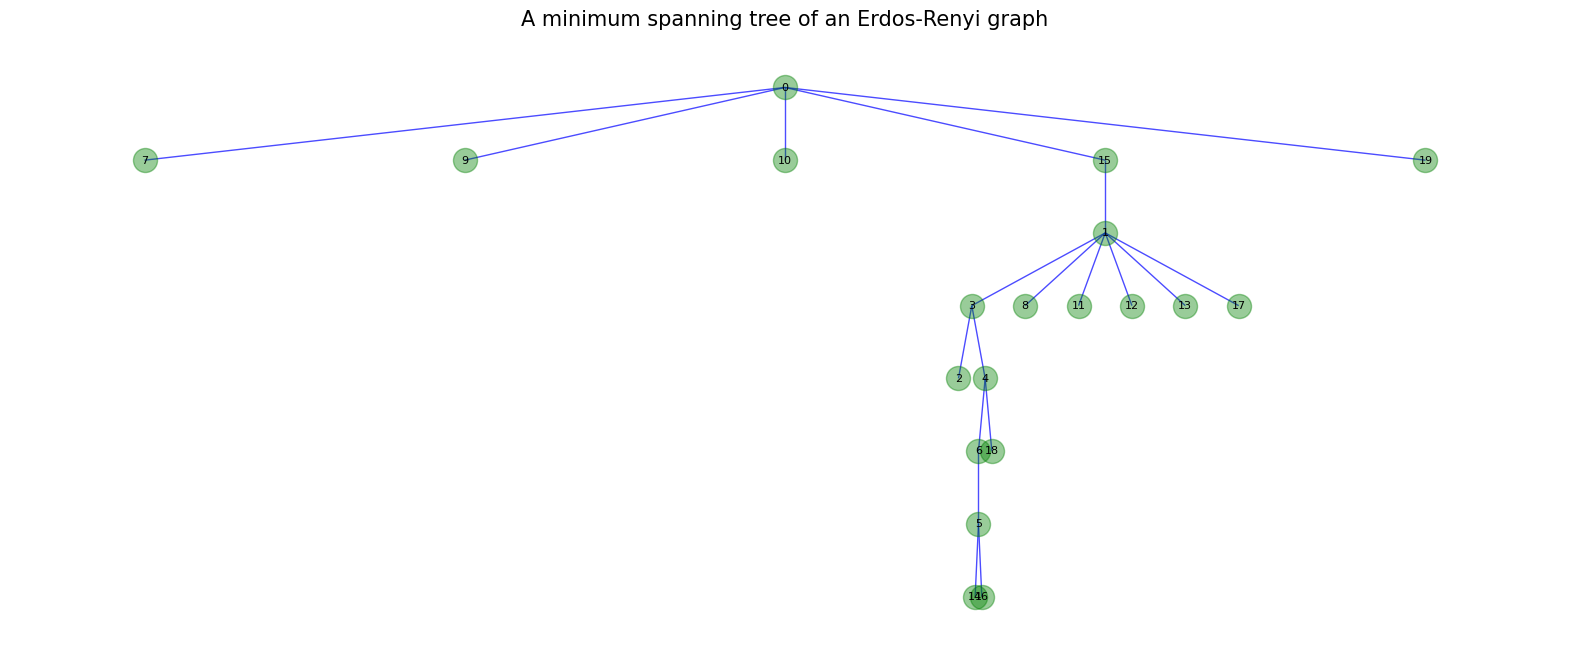

In [26]:
plt.figure(figsize=(20,8));

pos = hierarchy_pos(T,0)    
nodes = nx.draw_networkx_nodes(T, pos, node_color="g", alpha=0.4)#,)
nx.draw_networkx_edges(T, pos, edge_color='b', alpha=0.7)
nx.draw_networkx_labels(T, pos,font_size=8)

plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);

<a id='7'></a>
## <span style="color:green">7. Weighted Graphs</span>

*NetworkX can NOT plot weighted directed graphs with reciprocating edges among pairs of nodes!*

In [27]:
# Function alocating randomly integer weights on edges of a graph.

def weight_attr(G,maxw):
    # G is a graph
    # maxw is a positive integer (maximum weight value)
    weight={}
    for edge in G.edges():
        ed=edge[0]
        de=edge[1]
        G[ed][de]['weight']=random.randrange(1,maxw)
        weight[(ed,de)]=G[ed][de]['weight']
    return weight

The weighted Erdos-Renyi random undirected graph is an undirected graph
The weighted Erdos-Renyi random undirected graph is a weighted graph
The weighted Erdos-Renyi random undirected graph has 20 nodes and 43 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19.
The edges are:
 (0, 1, weight=6), (0, 2, weight=10), (0, 3, weight=7), (0, 6, weight=12), (0, 9, weight=9), (0, 11, weight=7), (0, 14, weight=10), (0, 15, weight=11), (0, 18, weight=9), (1, 10, weight=13), (1, 12, weight=3), (1, 13, weight=3), (1, 16, weight=12), (1, 18, weight=13), (1, 19, weight=1), (2, 7, weight=9), (3, 12, weight=8), (3, 18, weight=4), (4, 11, weight=10), (4, 12, weight=12), (4, 18, weight=4), (6, 8, weight=1), (6, 14, weight=11), (6, 16, weight=10), (7, 13, weight=10), (7, 19, weight=9), (8, 12, weight=6), (8, 13, weight=5), (8, 14, weight=9), (8, 18, weight=5), (8, 19, weight=3), (9, 11, weight=8), (9, 18, weight=1), (11, 12, weight=10), (11, 14, weight=3), (11, 17,

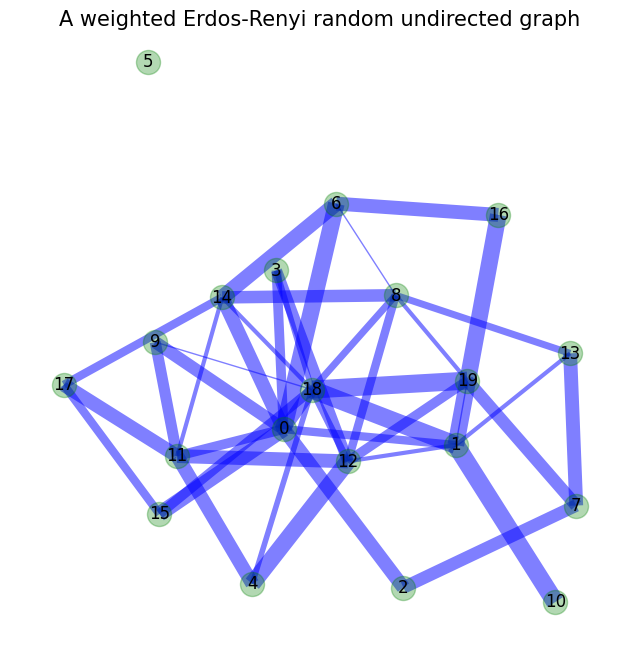

In [28]:
nodes=random.randint(15,26)
p=random.uniform(0.2,0.3)
name="weighted Erdos-Renyi random undirected"

G=nx.erdos_renyi_graph(nodes,p)
maxw=random.randint(5,16)
weight=weight_attr(G,maxw)
w_edges=[(x,y,z) for (x,y),z in weight.items()]
G.add_weighted_edges_from(w_edges)

gne(G,name)

edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w for w in edge_width]
print("min weight =",min(edge_width),"max weight =",max(edge_width))

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G, pos, width=edge_width, edge_color="b", alpha=0.5) #arrows=True, arrowsize=20, 
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);

min weight = 1 max weight = 13
The weighted Gnm random directed graph is a directed graph
The weighted Gnm random directed graph is a weighted graph
The weighted Gnm random directed graph has 22 nodes and 39 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21.
The edges are:
 (0, 5, weight=5), (0, 9, weight=5), (0, 10, weight=5), (0, 14, weight=5), (1, 7, weight=7), (2, 17, weight=2), (3, 6, weight=7), (4, 5, weight=4), (4, 8, weight=6), (5, 18, weight=6), (6, 20, weight=3), (7, 2, weight=2), (7, 17, weight=8), (10, 1, weight=4), (10, 3, weight=4), (10, 9, weight=6), (10, 11, weight=4), (10, 16, weight=4), (10, 17, weight=2), (10, 21, weight=3), (11, 14, weight=7), (12, 4, weight=8), (13, 16, weight=5), (14, 8, weight=8), (14, 9, weight=4), (14, 10, weight=6), (14, 17, weight=2), (15, 4, weight=6), (15, 20, weight=7), (16, 5, weight=1), (16, 9, weight=3), (17, 0, weight=3), (17, 1, weight=1), (18, 20, weight=5), (19, 12, weight=4), (19, 1

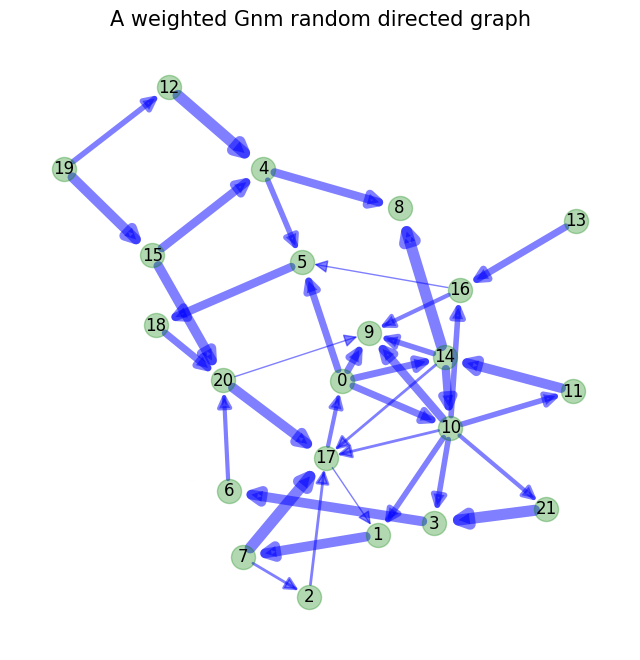

In [29]:
nodes=random.randint(15,26)
edges=40
name="weighted Gnm random directed"
G=nx.gnm_random_graph(nodes,edges,directed=True)

for e in G.edges():
    if (e[1],e[0]) in G.edges:
        G.remove_edge(*(e[1],e[0]))

maxw=random.randint(5,16)
weight=weight_attr(G,maxw)
w_edges=[(x,y,z) for (x,y),z in weight.items()]
G.add_weighted_edges_from(w_edges)
print("min weight =",min(edge_width),"max weight =",max(edge_width))

gne(G,name)

edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w for w in edge_width]

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);

<a id='8'></a>
## <span style="color:green">8. Multigraphs</span>

**Multigraph** is a (directed or undirected) graph with multiple edges (joining pairs of nodes).

*NetworkX can NOT plot directed multigraphs with reciprocating edges among pairs of nodes!*

In [30]:
def add_multiedges(G,k):
    # E is a list of edges
    # k is a positive integer for the edges to be added in parallel to existing ones 
    edges = list(G.edges())
    for _ in range(k):
        e=random.choice(list(E))
        for b in range(5):
            edges.append(e)
    Gm = nx.MultiGraph()
    Gm.add_edges_from(edges)
    return Gm

15
Counter({(10, 3): 11, (12, 16): 11, (0, 5): 6, (0, 12): 6, (5, 1): 6, (5, 13): 6, (11, 2): 6, (11, 4): 6, (12, 13): 6, (16, 6): 6, (7, 8): 6, (8, 14): 6, (14, 15): 6, (0, 10): 1, (0, 11): 1, (0, 16): 1, (5, 4): 1, (5, 10): 1, (5, 11): 1, (10, 2): 1, (10, 9): 1, (11, 16): 1, (12, 2): 1, (1, 2): 1, (1, 13): 1, (2, 7): 1, (2, 8): 1, (2, 9): 1, (8, 15): 1, (9, 3): 1, (9, 4): 1, (3, 6): 1})
1 11
The Erdos-Renyi random undirected multigraph graph is an undirected graph
The Erdos-Renyi random undirected multigraph graph is a multigraph
The Erdos-Renyi random undirected multigraph graph has 17 nodes and 107 edges.
The nodes are:
 0, 5, 10, 11, 12, 16, 1, 2, 13, 7, 8, 9, 3, 6, 4, 14, 15.
The edges are:
 (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 10), (0, 11), (0, 12), (0, 12), (0, 12), (0, 12), (0, 12), (0, 12), (0, 16), (1, 2), (1, 13), (2, 7), (2, 8), (2, 9), (3, 6), (5, 1), (5, 1), (5, 1), (5, 1), (5, 1), (5, 1), (5, 4), (5, 10), (5, 11), (5, 13), (5, 13), (5, 13), (5, 13), (5, 1

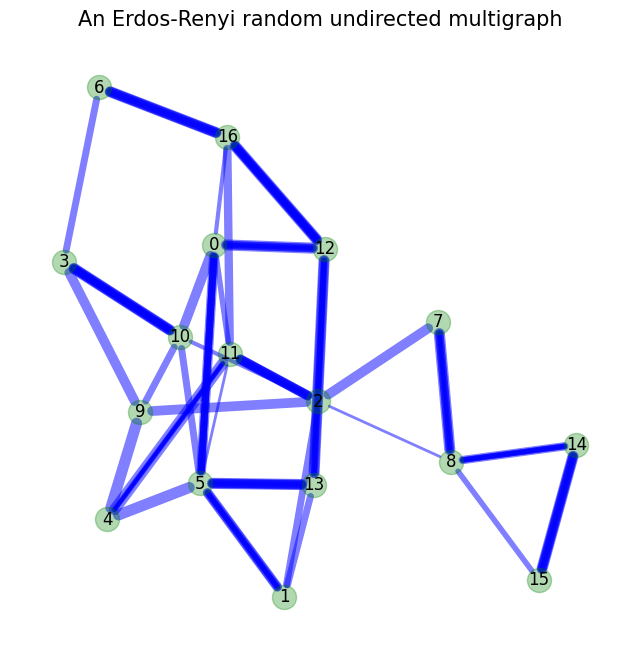

In [31]:
nodes=random.randint(15,26)
p=random.uniform(0.2,0.3)
name="Erdos-Renyi random undirected multigraph"
G=nx.erdos_renyi_graph(nodes,p)
        
E=G.edges()
k=random.randint(5,16)
print(k)

G=add_multiedges(G,k)
print(Counter(G.edges()))
print(min(Counter(G.edges()).values()),max(Counter(G.edges()).values()))
        
gne(G,name)

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("An "+name,fontsize=15);

The Gnm random directed multigraph graph is a directed graph
The Gnm random directed multigraph graph is a weighted graph
The Gnm random directed multigraph graph has 21 nodes and 38 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20.
The edges are:
 (0, 1, weight=8), (0, 3, weight=1), (0, 7, weight=6), (0, 20, weight=4), (1, 19, weight=7), (2, 3, weight=3), (3, 8, weight=7), (3, 9, weight=7), (3, 14, weight=5), (4, 10, weight=7), (4, 11, weight=2), (4, 13, weight=1), (5, 15, weight=1), (6, 3, weight=2), (7, 17, weight=5), (8, 7, weight=1), (8, 10, weight=3), (8, 17, weight=6), (9, 8, weight=3), (10, 18, weight=7), (12, 1, weight=2), (12, 14, weight=6), (12, 20, weight=1), (13, 8, weight=5), (14, 0, weight=7), (14, 5, weight=7), (14, 9, weight=4), (15, 6, weight=8), (15, 18, weight=8), (16, 1, weight=2), (16, 14, weight=7), (17, 1, weight=4), (17, 12, weight=7), (18, 4, weight=7), (18, 11, weight=7), (18, 13, weight=5), (20, 2, weight=4), (2

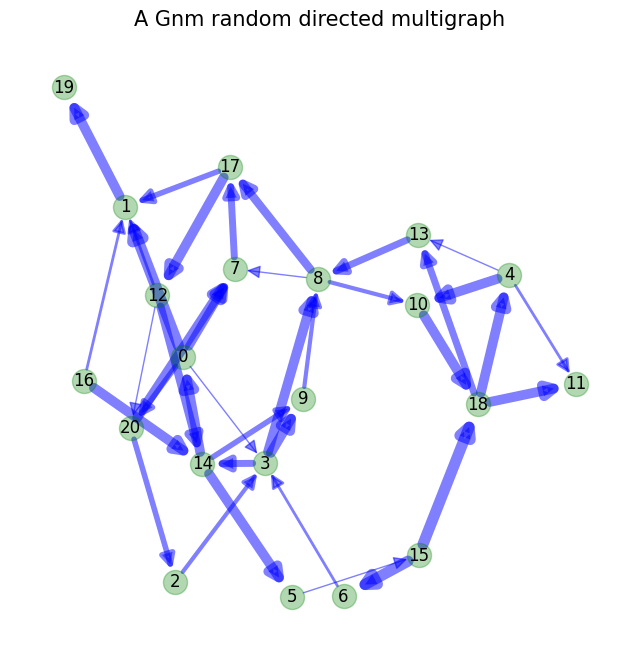

In [32]:
nodes=random.randint(15,26)
edges=40
name="Gnm random directed multigraph"
G=nx.gnm_random_graph(nodes,edges,directed=True)
for e in G.edges():
    if (e[1],e[0]) in G.edges:
        G.remove_edge(*(e[1],e[0]))
maxw=random.randint(5,16)
weight=weight_attr(G,maxw)
w_edges=[(x,y,z) for (x,y),z in weight.items()]
G.add_weighted_edges_from(w_edges)

gne(G,name)

edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w for w in edge_width]

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("A "+name,fontsize=15);

### Converting multigraph to weighted graph

The corresponding weighted Gnm random directed graph is a directed graph
The corresponding weighted Gnm random directed graph is a weighted graph
The corresponding weighted Gnm random directed graph has 21 nodes and 38 edges.
The nodes are:
 0, 3, 1, 20, 7, 19, 2, 14, 8, 9, 4, 11, 13, 10, 5, 15, 6, 17, 18, 12, 16.
The edges are:
 (0, 1, weight={'weight': 8}), (0, 3, weight={'weight': 1}), (0, 7, weight={'weight': 6}), (0, 20, weight={'weight': 4}), (1, 19, weight={'weight': 7}), (2, 3, weight={'weight': 3}), (3, 8, weight={'weight': 7}), (3, 9, weight={'weight': 7}), (3, 14, weight={'weight': 5}), (4, 10, weight={'weight': 7}), (4, 11, weight={'weight': 2}), (4, 13, weight={'weight': 1}), (5, 15, weight={'weight': 1}), (6, 3, weight={'weight': 2}), (7, 17, weight={'weight': 5}), (8, 7, weight={'weight': 1}), (8, 10, weight={'weight': 3}), (8, 17, weight={'weight': 6}), (9, 8, weight={'weight': 3}), (10, 18, weight={'weight': 7}), (12, 1, weight={'weight': 2}), (12, 14, weight={'weight'

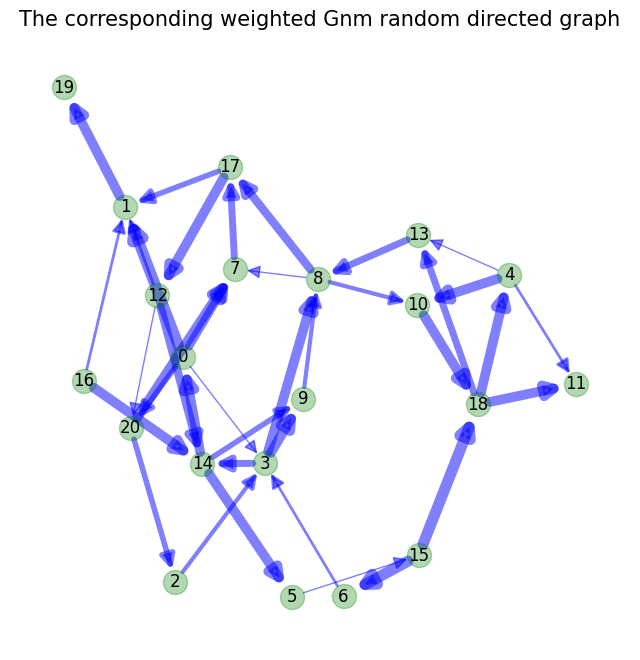

In [33]:
name="corresponding weighted Gnm random directed"
weight=[(x, y, {'weight': v}) for (x, y), v in Counter(G.edges()).items()]
G = nx.DiGraph(weight)
edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w['weight'] for w in edge_width]

gne(G,name)

pos=pos #graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("The "+name+" graph",fontsize=15);